In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\zahri\anaconda_projects\AsaiProjekt\Asai-Projekt\heart_2020_cleaned.csv")

#DataFrame-Stylee
styled_df = df.head(60).style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('text-align', 'center')]}
]).set_properties(**{'text-align': 'center'})

styled_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.600000,Yes,No,No,3.000000,30.000000,No,Female,55-59,White,Yes,Yes,Very good,5.000000,Yes,No,Yes
1,No,20.340000,No,No,Yes,0.000000,0.000000,No,Female,80 or older,White,No,Yes,Very good,7.000000,No,No,No
2,No,26.580000,Yes,No,No,20.000000,30.000000,No,Male,65-69,White,Yes,Yes,Fair,8.000000,Yes,No,No
3,No,24.210000,No,No,No,0.000000,0.000000,No,Female,75-79,White,No,No,Good,6.000000,No,No,Yes
4,No,23.710000,No,No,No,28.000000,0.000000,Yes,Female,40-44,White,No,Yes,Very good,8.000000,No,No,No
5,Yes,28.870000,Yes,No,No,6.000000,0.000000,Yes,Female,75-79,Black,No,No,Fair,12.000000,No,No,No
6,No,21.630000,No,No,No,15.000000,0.000000,No,Female,70-74,White,No,Yes,Fair,4.000000,Yes,No,Yes
7,No,31.640000,Yes,No,No,5.000000,0.000000,Yes,Female,80 or older,White,Yes,No,Good,9.000000,Yes,No,No
8,No,26.450000,No,No,No,0.000000,0.000000,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.000000,No,Yes,No
9,No,40.690000,No,No,No,0.000000,0.000000,Yes,Male,65-69,White,No,Yes,Good,10.000000,No,No,No


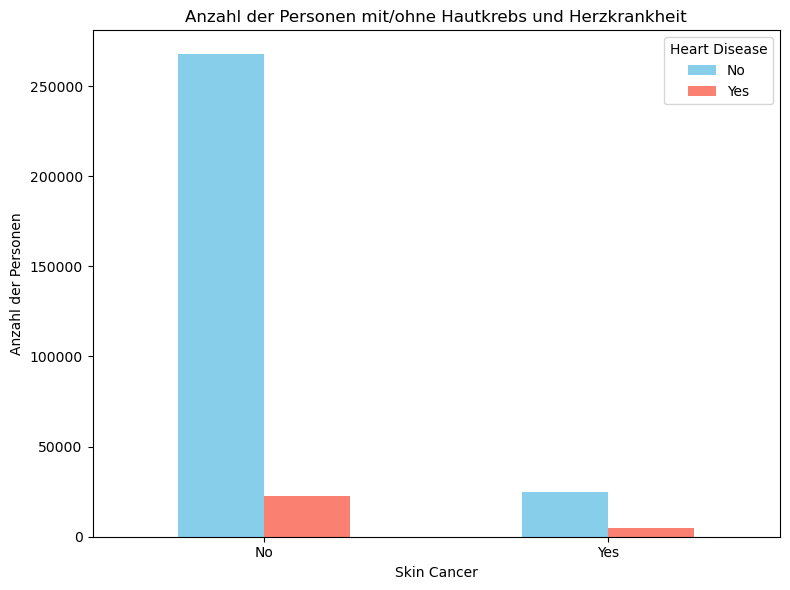

In [4]:
table = pd.crosstab(df["SkinCancer"], df["HeartDisease"])

#Balkendiagramm
table.plot(kind='bar', stacked=False, figsize=(8,6), color=['skyblue', 'salmon'])
plt.title('Anzahl der Personen mit/ohne Hautkrebs und Herzkrankheit')
plt.xlabel('Skin Cancer')
plt.ylabel('Anzahl der Personen')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease')
plt.tight_layout()
plt.show()

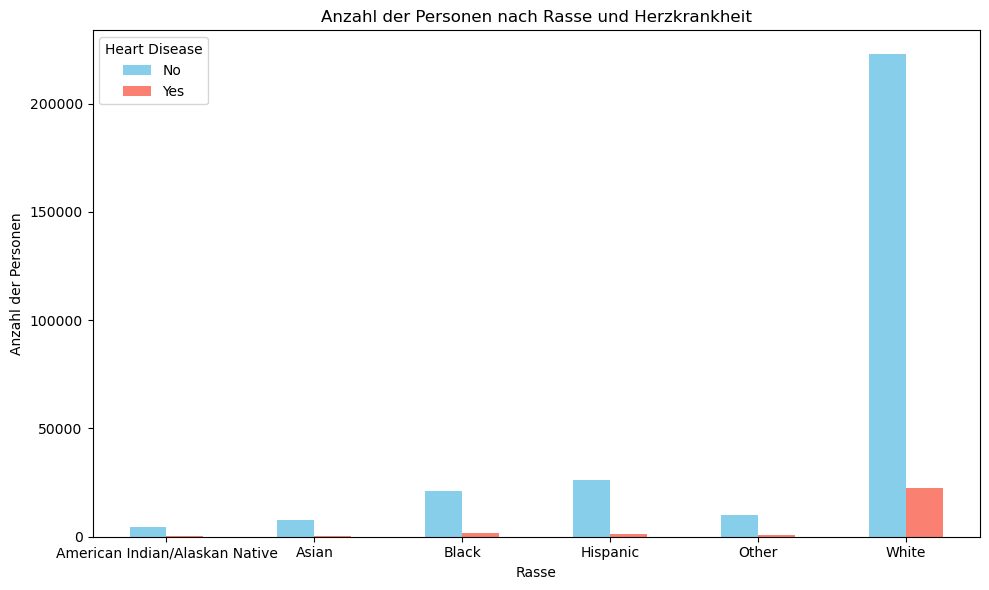

In [5]:
table = pd.crosstab(df["Race"], df["HeartDisease"])

#Balkendiagramm
table.plot(kind='bar', stacked=False, figsize=(10,6), color=['skyblue', 'salmon'])
plt.title('Anzahl der Personen nach Rasse und Herzkrankheit')
plt.xlabel('Rasse')
plt.ylabel('Anzahl der Personen')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease')
plt.tight_layout()
plt.show()


In [ ]:
df.info()

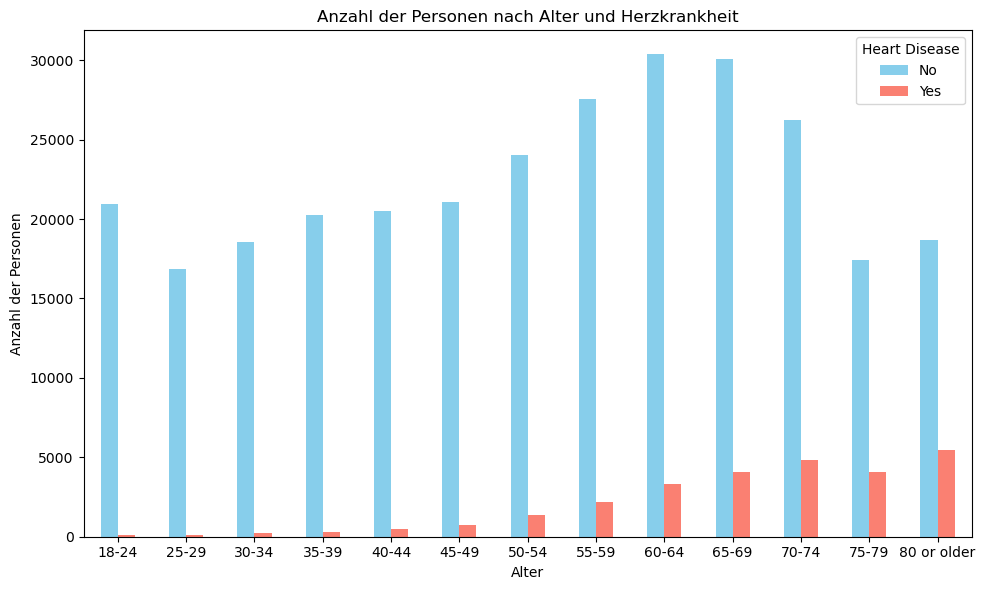

In [6]:
table = pd.crosstab(df["AgeCategory"], df["HeartDisease"])

#Balkendiagramm
table.plot(kind='bar', stacked=False, figsize=(10,6), color=['skyblue', 'salmon'])
plt.title('Anzahl der Personen nach Alter und Herzkrankheit')
plt.xlabel('Alter')
plt.ylabel('Anzahl der Personen')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease')
plt.tight_layout()
plt.show()


In [ ]:
df.describe()

In [8]:
bmi_too_high = df["BMI"] > 70
count_BMI_too_high = bmi_too_high.sum()
total_count = len(df)
print("Anzahl der Datensätze mit BMI über 70:", count_BMI_too_high)
print("Gesamtzahl der Datensätze:", total_count)
print("Prozentualer Anteil: {:.2f}%".format((count_BMI_too_high / total_count) * 100))

bmi_too_high_df = df[bmi_too_high]

#Formatierte Tabelle
bmi_too_high_df.head(10).style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('text-align', 'center')]}
]).set_properties(**{'text-align': 'center'})


Anzahl der Datensätze mit BMI über 70: 129
Gesamtzahl der Datensätze: 319795
Prozentualer Anteil: 0.04%


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
561,No,75.820000,No,No,No,0.000000,0.000000,No,Female,50-54,White,No,Yes,Good,8.000000,Yes,Yes,No
9088,No,82.760000,No,No,No,1.000000,0.000000,No,Female,50-54,Hispanic,Yes,Yes,Good,10.000000,No,No,No
9358,Yes,75.770000,Yes,Yes,Yes,0.000000,30.000000,Yes,Male,30-34,Black,Yes,No,Fair,15.000000,Yes,No,No
9499,Yes,83.000000,Yes,Yes,Yes,30.000000,30.000000,Yes,Male,50-54,Asian,No,No,Poor,18.000000,Yes,Yes,No
10659,No,81.460000,No,No,No,0.000000,0.000000,Yes,Female,50-54,Hispanic,No,Yes,Good,6.000000,No,No,No
13867,No,72.560000,No,No,No,0.000000,0.000000,No,Male,60-64,Other,No,No,Good,6.000000,No,No,No
16074,No,71.800000,No,No,No,0.000000,0.000000,Yes,Female,60-64,White,No,No,Good,7.000000,No,No,No
18927,Yes,79.100000,No,No,No,30.000000,30.000000,Yes,Female,70-74,Black,No,No,Poor,3.000000,No,No,No
21221,No,71.450000,No,No,Yes,30.000000,0.000000,Yes,Male,35-39,Hispanic,No,Yes,Poor,6.000000,Yes,No,No
24008,No,70.720000,No,No,No,30.000000,5.000000,Yes,Female,55-59,Hispanic,Yes,No,Poor,5.000000,Yes,Yes,No


In [9]:
sleepTime_too_high = df["SleepTime"] > 15
count_sleepTime_too_high = sleepTime_too_high.sum()
total_count = len(df)
print("Anzahl der Datensätze mit Sleep Time über 20:", count_sleepTime_too_high)
print("Gesamtzahl der Datensätze:", total_count)
print("Prozentualer Anteil: {:.2f}%".format((count_sleepTime_too_high / total_count) * 100))

sleepTime_too_high_df = df[sleepTime_too_high]

#Formatierte Tabelle
sleepTime_too_high_df.head(10).style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('text-align', 'center')]}
]).set_properties(**{'text-align': 'center'})

Anzahl der Datensätze mit Sleep Time über 20: 470
Gesamtzahl der Datensätze: 319795
Prozentualer Anteil: 0.15%


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
618,No,46.680000,No,No,No,30.000000,15.000000,Yes,Female,55-59,Black,No,Yes,Good,16.000000,No,No,No
718,No,19.790000,Yes,No,Yes,30.000000,10.000000,Yes,Female,60-64,Black,No,No,Poor,18.000000,Yes,No,No
1167,No,32.280000,Yes,No,No,30.000000,30.000000,Yes,Female,50-54,White,No,No,Fair,16.000000,No,No,No
1382,No,27.400000,No,No,No,0.000000,0.000000,No,Female,65-69,Black,Yes,No,Good,18.000000,No,No,No
1742,No,33.360000,No,No,No,5.000000,0.000000,No,Female,55-59,White,Yes,Yes,Good,16.000000,Yes,Yes,No
2179,No,17.630000,No,No,No,30.000000,0.000000,No,Male,65-69,Black,No,No,Poor,20.000000,No,No,No
2367,No,47.550000,No,No,No,0.000000,0.000000,No,Female,18-24,Black,No,Yes,Fair,16.000000,No,No,No
3233,No,29.050000,No,No,No,0.000000,5.000000,No,Female,35-39,Black,Yes,No,Fair,16.000000,No,No,No
3249,No,24.030000,No,No,No,0.000000,0.000000,No,Female,80 or older,White,No,Yes,Very good,18.000000,No,No,No
3641,No,25.090000,Yes,No,No,1.000000,0.000000,No,Male,70-74,White,No,Yes,Excellent,16.000000,Yes,No,No


Prozentualer Anteil:
 HeartDisease
No     91.440454
Yes     8.559546
Name: proportion, dtype: float64


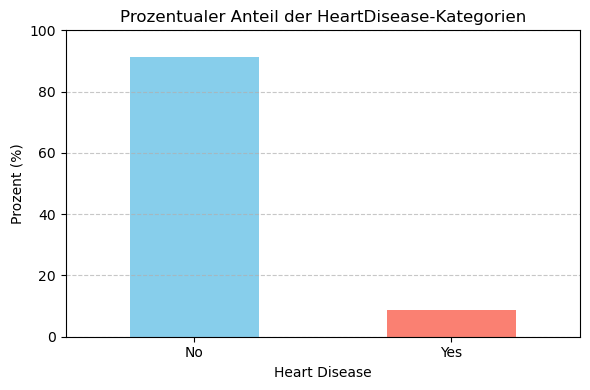

In [10]:
#Prozentualer Anteil HeartDisease
heart_disease_counts = df['HeartDisease'].value_counts(normalize=True) * 100
print("Prozentualer Anteil:\n", heart_disease_counts)

#Balkendiagramm
plt.figure(figsize=(6,4))
heart_disease_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Prozentualer Anteil der HeartDisease-Kategorien')
plt.ylabel('Prozent (%)')
plt.xlabel('Heart Disease')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

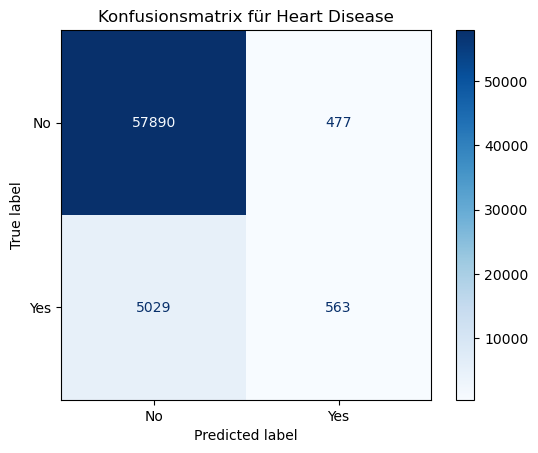

Genauigkeit: 0.9139136009005769


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

X = df.drop('HeartDisease', axis=1)
X = pd.get_dummies(X, drop_first=True)

y = df['HeartDisease'].map({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Konfusionsmatrix für Heart Disease')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit:", accuracy)


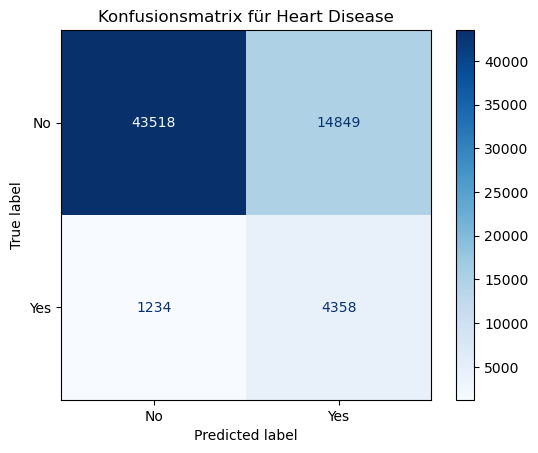

Genauigkeit: 0.748542034741006


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

X = df.drop('HeartDisease', axis=1)
X = pd.get_dummies(X, drop_first=True)

y = df['HeartDisease'].map({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Konfusionsmatrix für Heart Disease')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit:", accuracy)


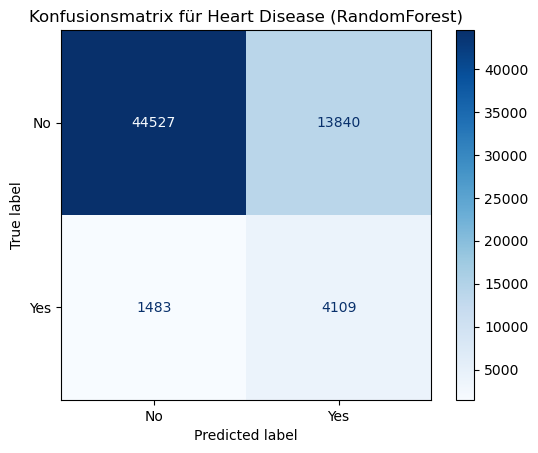

Genauigkeit: 0.7604246470395097


In [15]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('HeartDisease', axis=1)
X = pd.get_dummies(X, drop_first=True)

y = df['HeartDisease'].map({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # kannst du anpassen
    class_weight='balanced',  # wichtig für unbalancierte Daten
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Konfusionsmatrix für Heart Disease (RandomForest)')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit:", accuracy)


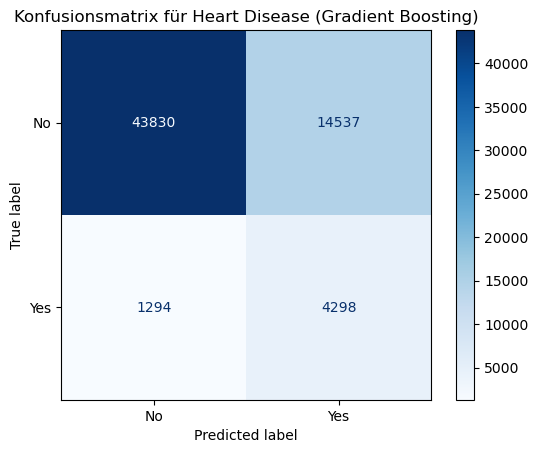

Genauigkeit: 0.7524820588189309

Classification Report:
               precision    recall  f1-score   support

          No       0.97      0.75      0.85     58367
         Yes       0.23      0.77      0.35      5592

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959



In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight

X = df.drop('HeartDisease', axis=1)
X = pd.get_dummies(X, drop_first=True)

y = df['HeartDisease'].map({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# sample_weight für Balancing berechnen
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

model = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42
)
model.fit(X_train, y_train, sample_weight=sample_weights)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Konfusionsmatrix für Heart Disease (Gradient Boosting)')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['No', 'Yes']))
